# Contents list:
### 1. Import libraries and data
### 2. Pick out variables
### 3. Exploratory visualizations
#### 3a. Correlation matrix heatmap
#### 3b. Scatterplot
#### 3c. Pair plot
#### 3d. Categorical plot
### 4. Revisit key questions
### 5. Define hypotheses

## 1. Import libraries and data

In [3]:
# import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

# LabelEncoder helps convert text labels into numbers (ex: 0, 1, 2), makes it easier to tally up without dealing with words
from sklearn.preprocessing import LabelEncoder

# Contextily used for adding map backgrounds to plots
import contextily as ctx

# Folium is used to visualize data that has a geographical component (ex: plotting locations on a map)
import folium
from folium.plugins import HeatMap

In [4]:
# make path variable
path = r'C:\Users\justi\Downloads\2024AirbnbAmsterdam'

In [5]:
# import Amsterdam listings dataset, ensure "index_col=0" removes the "Unnamed:0 index column", and address memory usage concerns with "low_memory= False"
df_listings = pd.read_csv(os.path.join(path, 'listings_checked.csv'), index_col = 0, low_memory= False)

In [6]:
df_listings.head()

,caption,host_id,host_is_superhost,host_listings_count,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,...,guests_included,extra_people,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,instant_bookable,cancellation_policy,first_review,last_review
id,,,,,,,,,,,,,,,,,,,,,
2818,Quiet Garden View Room & Super Fast WiFi,3159,t,1,Oostelijk Havengebied - Indische Buurt,52.365755,4.941419,Apartment,Private room,2,...,1,20,3,15,248,97,t,strict_14_with_grace_period,3/30/2009,11/28/2018
3209,"Quiet apt near center, great view",3806,f,1,Westerpark,52.390225,4.873924,Apartment,Entire home/apt,5,...,2,15,4,20,42,96,f,moderate,7/31/2015,8/29/2018
20168,100%Centre-Studio 1 Private Floor/Bathroom,59484,f,2,Centrum-Oost,52.365087,4.893541,Townhouse,Entire home/apt,2,...,2,0,1,1000,233,87,f,strict_14_with_grace_period,3/2/2010,11/30/2018
25428,Lovely apt in City Centre (Jordaan),56142,f,2,Centrum-West,52.373114,4.883668,Apartment,Entire home/apt,3,...,2,10,14,60,1,100,f,strict_14_with_grace_period,1/21/2018,1/21/2018
27886,"Romantic, stylish B&B houseboat in canal district",97647,t,1,Centrum-West,52.386727,4.892078,Houseboat,Private room,2,...,1,0,2,730,171,99,t,strict_14_with_grace_period,1/9/2012,11/25/2018


In [7]:
df_listings.columns

Index(['caption', 'host_id', 'host_is_superhost', 'host_listings_count',
       'neighbourhood_cleansed', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'amenities',
       'price', 'guests_included', 'extra_people', 'minimum_nights',
       'maximum_nights', 'number_of_reviews', 'review_scores_rating',
       'instant_bookable', 'cancellation_policy', 'first_review',
       'last_review'],
      dtype='object')

In [8]:
df_listings.shape

(20024, 24)

## 2. Pick out variables from your dataset suitable for your exploratory visual analysis

### 2a. "host_is_superhost" vs. "price"
### 2b. "instant_bookable" vs. "number_of_reviews"
### 2c. "cancellation_policy" vs. "property_type"

In [13]:
# Filter to specified variables
df_listings.loc[:, ['host_is_superhost', 'price', 'instant_bookable', 'number_of_reviews', 'cancellation_policy', 'property_type']]

,host_is_superhost,price,instant_bookable,number_of_reviews,cancellation_policy,property_type
id,,,,,,
2818,t,59,t,248,strict_14_with_grace_period,Apartment
3209,f,160,f,42,moderate,Apartment
20168,f,80,f,233,strict_14_with_grace_period,Townhouse
25428,f,125,f,1,strict_14_with_grace_period,Apartment
27886,t,150,t,171,strict_14_with_grace_period,Houseboat
...,...,...,...,...,...,...
30576148,f,340,f,0,strict_14_with_grace_period,House
30577727,f,150,f,0,flexible,Apartment
30578037,f,80,f,0,moderate,Apartment


In [14]:
# 't' and 'f' in 'host_is_superhost' are strings. Convert to boolean values
df_listings['host_is_superhost'] = df_listings['host_is_superhost'].map({'t': True, 'f': False})

In [15]:
# Convert 'host_is_superhost' from boolean--> integers to prepare for correlation mapping
df_listings['host_is_superhost'] = df_listings['host_is_superhost'].astype(int)

In [16]:
# Check frequency count for 'host_is_superhost', 0= f (not superhost), 1= t (yes superhost)
df_listings['host_is_superhost'].value_counts(dropna = False)

host_is_superhost
0    16854
1     3170
Name: count, dtype: int64

In [17]:
# 't' and 'f' in 'instant_bookable' are strings. Convert to boolean values
df_listings['instant_bookable'] = df_listings['instant_bookable'].map({'t': True, 'f': False})

In [18]:
# Convert 'instant_bookable' from boolean--> integers to prepare for correlation mapping
df_listings['instant_bookable'] = df_listings['instant_bookable'].astype(int)

In [19]:
# Check frequency count for 'instant_bookable', 0= f (not instant bookable), 1= t (yes instant bookable)
df_listings['instant_bookable'].value_counts(dropna = False)

instant_bookable
0    15226
1     4798
Name: count, dtype: int64

In [20]:
# Descriptive statistics
df_listings.describe()

,host_id,host_is_superhost,host_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,price,guests_included,extra_people,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,instant_bookable
count,2.002400e+04,20024.000000,20024.000000,20024.000000,20024.000000,20024.000000,20024.000000,20024.000000,20024.000000,20024.000000,20024.000000,20024.000000,20024.000000,20024.000000,20024.000000,20024.000000
mean,4.868320e+07,0.158310,6.106272,52.365211,4.888980,2.891930,1.137110,1.444517,152.207052,1.469087,11.318767,3.329055,631.133440,21.561027,82.358819,0.239612
std,5.649750e+07,0.365041,30.389998,0.015997,0.035564,1.318866,0.794223,0.885954,145.840414,0.937993,22.154658,12.539263,541.347045,43.243456,32.667745,0.426858
min,3.159000e+03,0.000000,0.000000,52.288378,4.753247,1.000000,0.000000,0.000000,8.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,8.091616e+06,0.000000,1.000000,52.355127,4.863615,2.000000,1.000000,1.000000,96.000000,1.000000,0.000000,2.000000,21.000000,3.000000,90.000000,0.000000
50%,2.369337e+07,0.000000,1.000000,52.364589,4.886394,2.000000,1.000000,1.000000,125.000000,1.000000,0.000000,2.000000,1125.000000,8.000000,96.000000,0.000000
75%,6.827379e+07,0.000000,1.000000,52.375072,4.908283,4.000000,1.000000,2.000000,175.000000,2.000000,20.000000,3.000000,1125.000000,22.000000,99.000000,0.000000
max,2.293612e+08,1.000000,698.000000,52.424713,5.027689,17.000000,100.500000,12.000000,8500.000000,16.000000,280.000000,1001.000000,9999.000000,695.000000,100.000000,1.000000


## 3. Exploratory visualizations

#### 3a. Create a correlation matrix heatmap (colored). Discuss what the coefficients in the plot mean in terms of the relationships between the variables.

#### Answer: There is a high correlation of 0.72 number of beds increase, the listing accomodates increase to more people, which is practical and makes sense. There is a moderately positive correlation of 0.36 of number of accomodates, price increase.  A correlation of 0.33 suggests that listings with more reviews are moderately more likely to have a superhost. There is a weak correlation of 0.1 if the listing has "instant_bookable" capability, it does not affect "number_of_reviews". There is virtually no linear relationship between "host_is_superhost" and "price" as it is nearly 0 (0.0033).

In [22]:
# Create a subset of 'df_listings' to be used for correlation mapping
sub = df_listings[['host_is_superhost', 'instant_bookable', 'accommodates', 'bedrooms','price', 'minimum_nights', 'review_scores_rating', 'number_of_reviews']]

In [23]:
# Create a correlation matrix using pandas
sub.corr()

,host_is_superhost,instant_bookable,accommodates,bedrooms,price,minimum_nights,review_scores_rating,number_of_reviews
host_is_superhost,1.000000,0.029304,-0.028467,-0.054994,-0.003262,-0.022794,0.166397,0.326807
instant_bookable,0.029304,1.000000,-0.014148,-0.066928,-0.011611,-0.023045,-0.040337,0.101440
accommodates,-0.028467,-0.014148,1.000000,0.722429,0.356603,0.006466,-0.046458,-0.060125
bedrooms,-0.054994,-0.066928,0.722429,1.000000,0.309222,0.019075,-0.031074,-0.104026
price,-0.003262,-0.011611,0.356603,0.309222,1.000000,0.039110,-0.060029,-0.067443
minimum_nights,-0.022794,-0.023045,0.006466,0.019075,0.039110,1.000000,-0.032819,-0.022030
review_scores_rating,0.166397,-0.040337,-0.046458,-0.031074,-0.060029,-0.032819,1.000000,0.190567
number_of_reviews,0.326807,0.101440,-0.060125,-0.104026,-0.067443,-0.022030,0.190567,1.000000


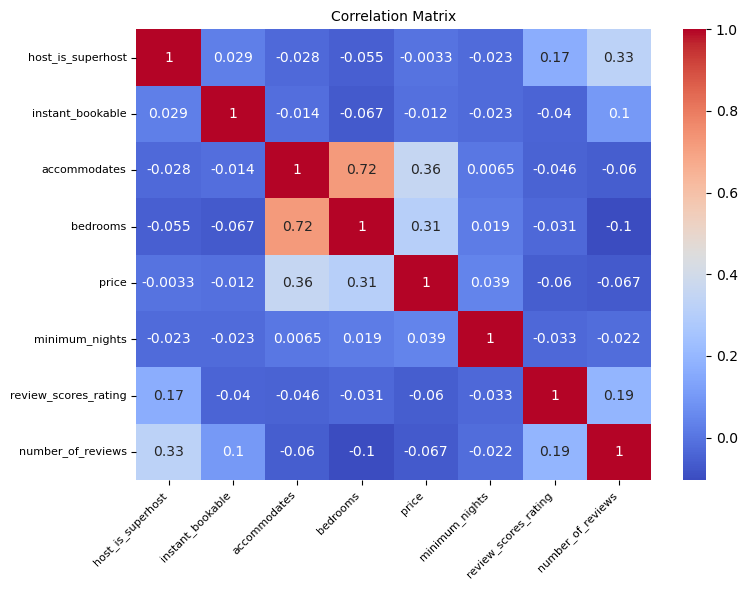

In [27]:
# Create a subplot with matplotlib,  figure (f) and a set of subplots (ax) with figures 8x6 inches
f, ax = plt.subplots(figsize=(8, 6))

# Create the correlation heatmap in seaborn using sns.heatmap and referencing 'sub.corr()' matrix above
# 'ax=ax' sets the subplot where the heatmap will be drawn
corr = sns.heatmap(sub.corr(), annot=True, ax=ax, cmap="coolwarm")

# Set labels
ax.set_xticklabels(sub.columns, fontsize=8, rotation=45, ha='right')
ax.set_yticklabels(sub.columns, fontsize=8)

plt.title('Correlation Matrix', fontsize=10)  

# Adjust the layout
plt.tight_layout()  
plt.show()

#### 3b. Create a scatterplot (or plots) for the variables with the strongest correlations and examine the nature of their relationships. Discuss the output in a markdown cell.

#### Answer: As the number of bedrooms offered in the listing increases, it accomodates more people.

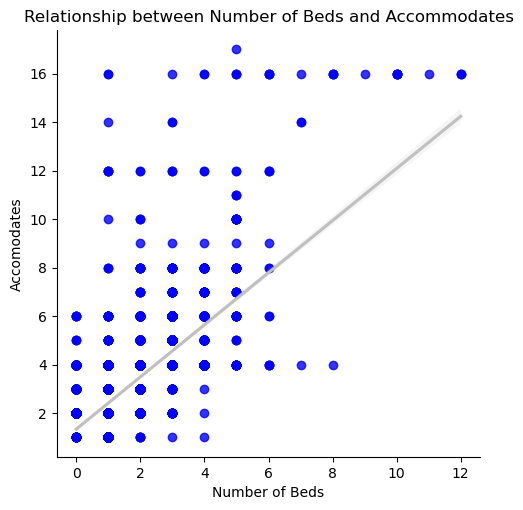

In [30]:
# Since there is 0.72 correlation of 'bedrooms' and 'accommodates' create a scatterplot for those variables in seaborn

sns.lmplot(x='bedrooms', y='accommodates', data=sub, scatter_kws={'color': 'blue'}, line_kws={'color': 'silver'})

# Labels & Titles
plt.title('Relationship between Number of Beds and Accommodates')
plt.xlabel('Number of Beds')
plt.ylabel('Accomodates')

plt.show()

#### 3c. Create a pair plot of the entire data set. Comment on the distribution of the variables and mark variables you’d like to explore further with an explanation of why.

#### Answer: Majority of the listings are under 2000 price. There are significantly more options under 400 reviews that can also receive a high score of satisfaction (80+). It looks like the majority of available listings accomodates 5 people and under and receives a review. I would like to explore further if there is an relationship between "cancelation policy" and "number of reviews" to see if being strict affects the number of reviews collected.

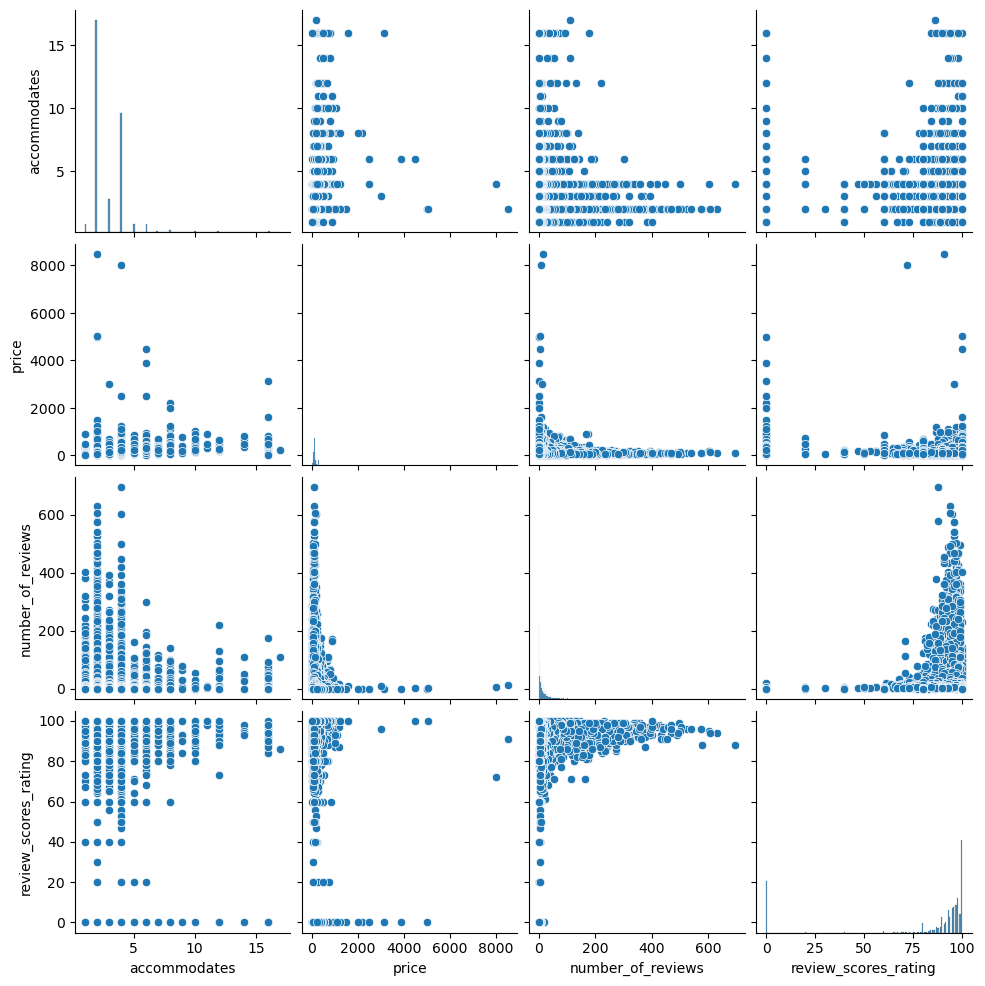

In [35]:
# Create a subset with variables to zone in the pair plot
# Create a pair plot 
sub_2 = df_listings[['accommodates', 'price',  'number_of_reviews', 'review_scores_rating']]
df_pairplot = sns.pairplot(sub_2)

#### 3d. Create a categorical plot and interpret the results.

#### Answer: 

In [47]:
# Create a pivot table
df_cancellation_pivot = pd.pivot_table(df_listings, index='cancellation_policy', values='number_of_reviews', aggfunc='sum')

# Sort the pivot table from largest to smallest
df_sorted = df_cancellation_pivot.sort_values(by='number_of_reviews', ascending=False)

print(df_sorted)

                             number_of_reviews
cancellation_policy                           
strict_14_with_grace_period             195661
moderate                                177363
flexible                                 58142
super_strict_60                            572


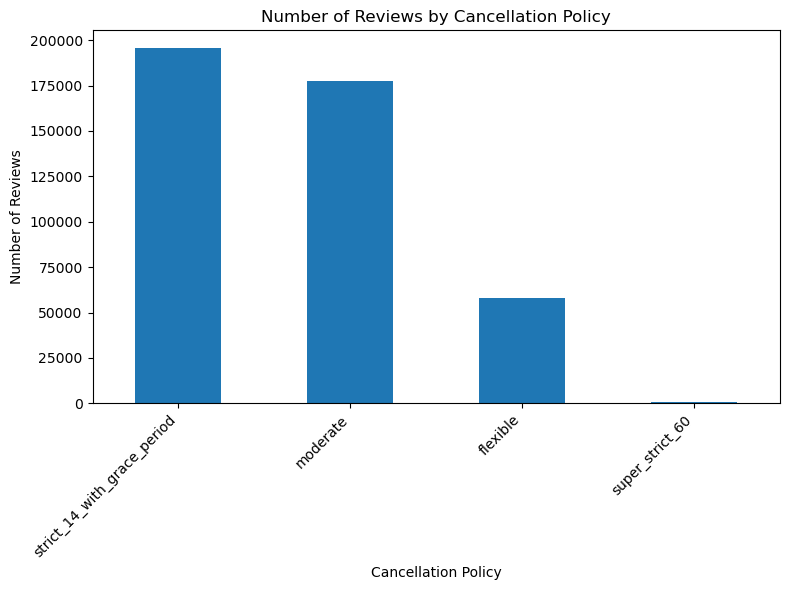

In [48]:
# Create a bar plot
df_sorted.plot(kind='bar', legend=False, figsize=(8, 6))

# Customize the plot
plt.title('Number of Reviews by Cancellation Policy')
plt.xlabel('Cancellation Policy')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.show()

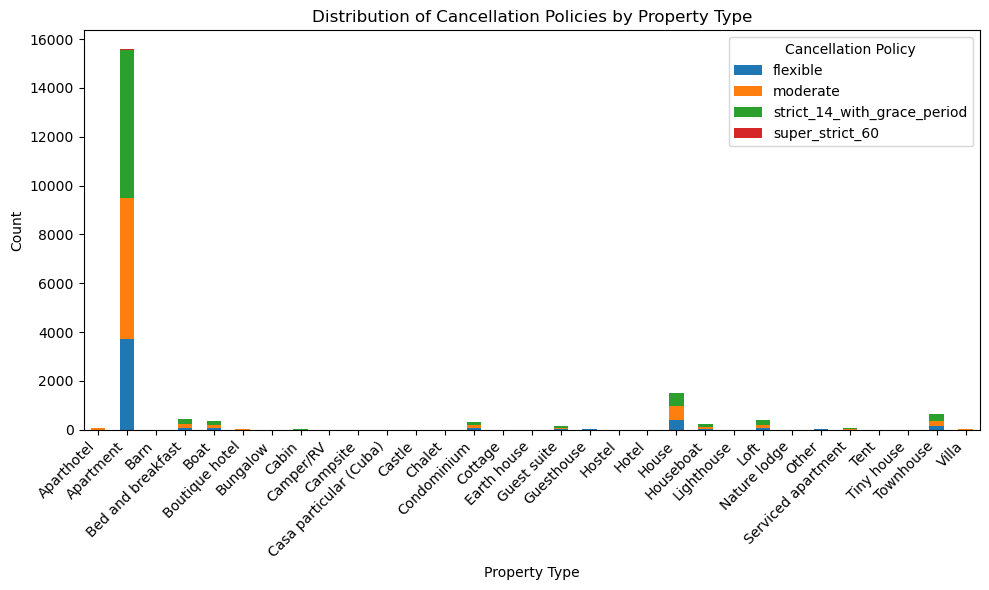

In [50]:
# Create a pivot table to count the occurrences of 'property_type' and its 'cancellation_policy'
df_pt_pivot = df_listings.pivot_table(index='property_type', columns='cancellation_policy', aggfunc='size', fill_value=0)

# Plot the stacked bar chart
df_pt_pivot.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Distribution of Cancellation Policies by Property Type')
plt.xlabel('Property Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Cancellation Policy')
plt.tight_layout()
plt.show()

In [51]:
# Create a new column 'is_apartment' to categorize listings
df_listings['is_apartment'] = df_listings['property_type'].apply(lambda x: 'Apartment' if x == 'Apartment' else 'Not Apartment')

# Perform frequency count
frequency_count = df_listings['is_apartment'].value_counts()
frequency_count

is_apartment
Apartment        15579
Not Apartment     4445
Name: count, dtype: int64

In [53]:
# Calculate neighborhood counts
neighborhood_counts = df_listings['neighbourhood_cleansed'].value_counts()
neighborhood_counts

neighbourhood_cleansed
De Baarsjes - Oud-West                    3515
De Pijp - Rivierenbuurt                   2493
Centrum-West                              2326
Centrum-Oost                              1729
Westerpark                                1490
Zuid                                      1440
Oud-Oost                                  1282
Bos en Lommer                             1143
Oostelijk Havengebied - Indische Buurt     959
Oud-Noord                                  571
Watergraafsmeer                            552
IJburg - Zeeburgereiland                   452
Slotervaart                                393
Noord-West                                 320
Buitenveldert - Zuidas                     262
Noord-Oost                                 256
Geuzenveld - Slotermeer                    212
Osdorp                                     158
De Aker - Nieuw Sloten                     142
Gaasperdam - Driemond                      122
Bijlmer-Centrum                      

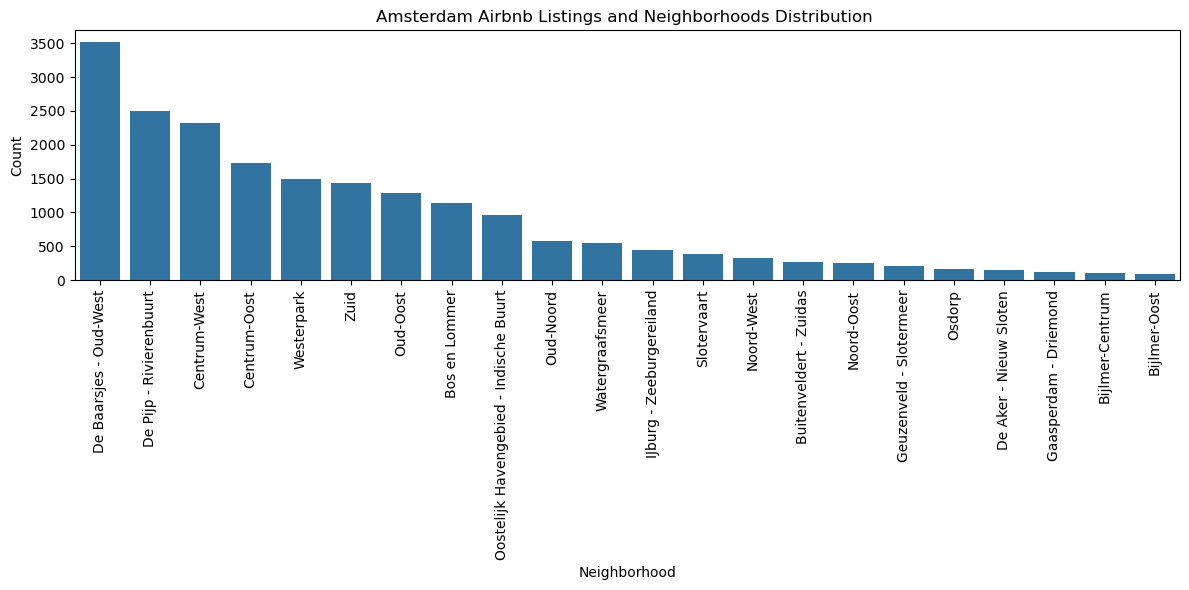

In [56]:
# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=neighborhood_counts.index, y=neighborhood_counts.values)

plt.title('Amsterdam Airbnb Listings and Neighborhoods Distribution ')
plt.xlabel('Neighborhood')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust the plot to ensure everything fits without overlapping
plt.show()

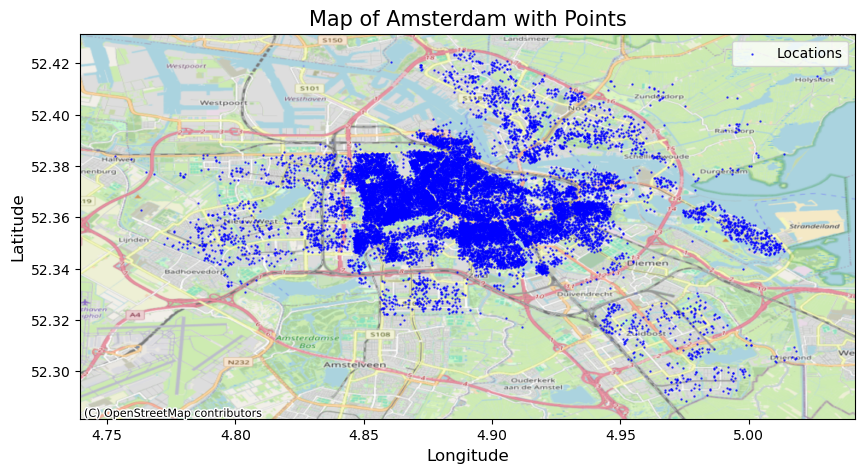

In [65]:
# Create a map using 'longitude', 'latitude', and Contextily library
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the data points on the map
ax.scatter(df_listings['longitude'], df_listings['latitude'], c='blue', s=0.5, label='Locations', alpha=0.7)

# Set title and labels
ax.set_title('Map of Amsterdam with Points', fontsize=15)
ax.set_xlabel('Longitude', fontsize=12)
ax.set_ylabel('Latitude', fontsize=12)

# Add a basemap from Contextily and free and opensource OpenStreetMap.Mapnik
ctx.add_basemap(ax, crs='EPSG:4326', source=ctx.providers.OpenStreetMap.Mapnik)

# Show the legend
plt.legend()

# Show the plot
plt.show()

In [66]:
# Import another library for distance calculation
from geopy.distance import geodesic  

# Coordinates of Dam Square
dam_square_coords = (52.373100, 4.892351)

# Calculate distance from Dam Square for each listing and classify
def classify_distance(row, reference_point):
    # Calculate distance using geodesic
    listing_coords = (row['latitude'], row['longitude'])
    distance = geodesic(listing_coords, reference_point).miles
    
    # Classify based on distance (if less than or =1 mile, make it 'green'; otherwise make it 'orange')
    if distance <= 1:
        return 'green'
    else:
        return 'orange'

    # Apply the classification
df_listings['color'] = df_listings.apply(classify_distance, reference_point=dam_square_coords, axis=1)

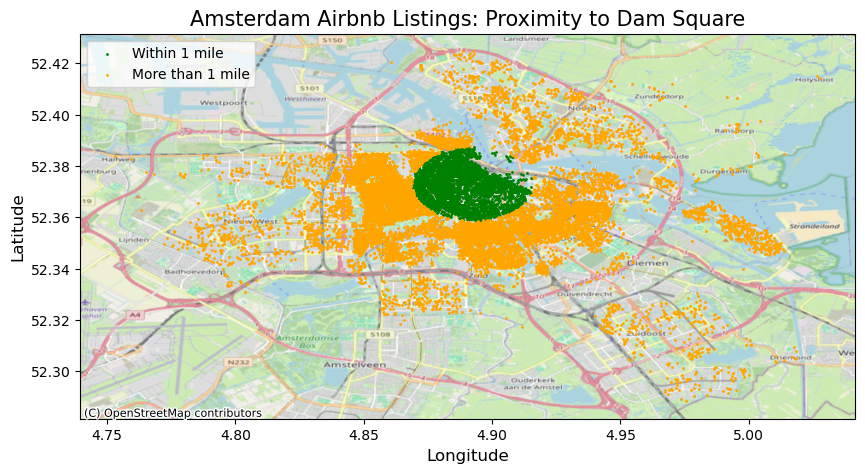

In [67]:
# Create a plot
fig, ax = plt.subplots(figsize=(10, 8))

# Plot green listings (within 1 mile)
green_listings = df_listings[df_listings['color'] == 'green']
ax.scatter(green_listings['longitude'], green_listings['latitude'], c='green', s=1, label='Within 1 mile')

# Plot orange listings (more than 1 mile)
orange_listings = df_listings[df_listings['color'] == 'orange']
ax.scatter(orange_listings['longitude'], orange_listings['latitude'], c='orange', s=1, label='More than 1 mile')

# Set title and labels
ax.set_title('Amsterdam Airbnb Listings: Proximity to Dam Square', fontsize=15)
ax.set_xlabel('Longitude', fontsize=12)
ax.set_ylabel('Latitude', fontsize=12)

# Add a basemap from OpenStreetMap
ctx.add_basemap(ax, crs='EPSG:4326', source=ctx.providers.OpenStreetMap.Mapnik)

# Show the legend
plt.legend()

# Show the plot
plt.show()

In [68]:
# Perform frequency count
green_count = df_listings['color'].value_counts()
green_count

color
orange    15156
green      4868
Name: count, dtype: int64

In [69]:
# Export dataframe:
df_listings.to_csv(os.path.join(path, 'listings_checked2.csv'))

## 4. Revise key questions

#### Write answers to those you can based on the exploration you’ve conducted so far. Add any new questions that may have arisen based on the early findings in your visual exploration.

#### 1. Does “being a superhost” or “not superhost” influence have a positive or negative correlation on their charging price to guests?
#### Answer: While being a superhost might be moderately associated with having more reviews (with correlation of 0.33), there is virtually no linear relationship between "host_is_superhost" and "price" as it is nearly 0 (0.0033).

#### 2. Does “instant_bookable” have a positive or negative correlation of “number_of_reviews” received?
#### Answer: There is a weak correlation of 0.1 if the listing has "instant_bookable" capability, it does not affect "number_of_reviews". 

#### 3. Does “cancellation_policy” vary drastically among “property_type” of (Apartment, Boat, Campsite, Hotel, Townhome, etc)?
#### Answer: 78% of 20,000+ Amsterdam listings are "Apartments". Within that property type, there looks almost equal distribution of "strict with 14 day grace period", "moderate", and "flexible".

#### 4. Where are these listings situated (how many miles/ km) is it from epicenter Dam Square?
#### Answer: 76% of 20,000+ Amsterdam listings are within 1 mile from Dam Square.

#### 5. Using first and last review dates, what is the growth of the number of listings from beginning of year to end?
#### I would need to find time to 1) Define start and end of this static dataset of 1/1/2018- 12/31/2018, 2) Count unique number of active listings, 3) Calculate growth % in number of listings from start of the year to the end

### New questions:
#### 6. What is the average price of apartments under 1 mile of Dam Square?

#### 7. How do price per night vary among different specified cancellation type: "Flexible", "Moderate", "Strict14"?

## 5. Define hypotheses

#### Null Hypothesis: If apartment is 1+ mile away from Dam Square, the average price is more expensive than those apartments <1 mile.
#### Alternate Hypothesis: If apartment is 1+ mile away from Dam Square, the average price is cheaper than those apartments <1 mile.